In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
xls = pd.ExcelFile('nba_draft.xlsx')

map = {}
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)

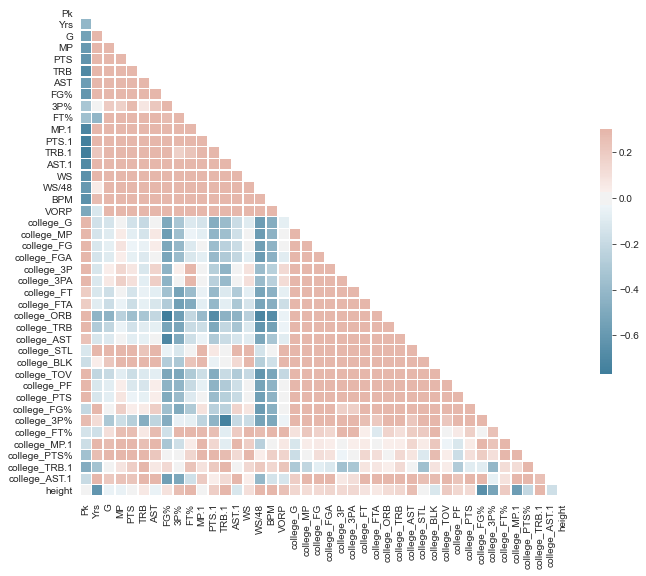

In [3]:
e = map['draft_data_2018']
e = e.loc[e['position'] == 'Small']


corr = e.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
frames = []
for key, value in map.items():
    test = value.loc[value['position'] == 'Small']
    test.reset_index(drop=True,inplace=True)
    test.index = test.index + 1
    test.Pk = test.index

    frames.append(test)


# remove 2019 data to predict it
frames.pop()

/Users/vivianli/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,college_FT%,college_MP.1,college_PTS%,college_TRB.1,college_AST.1,height,weight,date_of_birth,place_of_birth,position
1,1,LAL,De'Andre Hunter,Virginia,1.0,63.0,2018.0,778.0,286.0,112.0,...,0.773,26.6,12.4,4.4,1.6,6.583333,225lb,"December 2, 1997",Pennsylvania,Small
2,2,ATL,Cam Reddish,Duke,1.0,58.0,1551.0,610.0,216.0,87.0,...,0.772,29.7,13.5,3.7,1.9,6.666667,218lb,"September 1, 1999",Pennsylvania,Small
3,3,SAS,Keldon Johnson,Kentucky,1.0,17.0,301.0,154.0,57.0,15.0,...,0.703,30.7,13.5,5.9,1.6,6.416667,220lb,"October 11, 1999",Virginia,Small
4,4,MIL,Kevin Porter,USC,1.0,50.0,1162.0,498.0,162.0,109.0,...,0.522,22.1,9.5,4.0,1.4,6.333333,203lb,"May 4, 2000",Washington,Small
5,5,CHO,Cody Martin,Nevada,1.0,48.0,903.0,238.0,158.0,95.0,...,0.689,28.9,9.7,4.6,3.6,6.416667,205lb,"September 28, 1995",North Carolina,Small
6,6,SAC,Justin James,Wyoming,1.0,36.0,232.0,89.0,32.0,18.0,...,0.731,28.1,15.7,5.4,2.6,6.583333,190lb,"January 24, 1997",Florida,Small
7,7,SAC,Ignas Brazdeikis,Michigan,1.0,9.0,53.0,17.0,5.0,4.0,...,0.773,29.6,14.8,5.4,0.8,6.500000,221lb,"January 8, 1999",Lithuania,Small
8,8,LAC,Terance Mann,Florida State,1.0,41.0,362.0,99.0,55.0,53.0,...,0.670,25.9,9.4,5.1,1.9,6.416667,215lb,"October 18, 1996",New York,Small
9,9,CHO,Jalen McDaniels,San Diego State,1.0,16.0,293.0,89.0,65.0,13.0,...,0.758,27.9,13.2,7.9,1.5,6.833333,205lb,"January 31, 1998",Washington,Small
10,10,GSW,Miye Oni,Yale,1.0,10.0,109.0,35.0,17.0,4.0,...,0.777,31.7,15.0,6.2,3.3,6.416667,206lb,"August 4, 1997",California,Small


In [5]:
import sklearn
from sklearn import linear_model
lreg = linear_model.LinearRegression()

In [6]:
# remove any rows that have null values
for each in frames:
    each.dropna(how='any',axis=0,inplace=True) 
    

<ipython-input-6-6d029aeef424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each.dropna(how='any',axis=0,inplace=True)


In [7]:
loop_size = len(frames)
new_frame = []

for i in range(0,loop_size):
    if frames[i].empty is False:
        new_frame.append(frames[i])
        


In [8]:
for each in new_frame:

    X = each.loc[:,each.columns.str.startswith('college')]
    Y = each['Pk']

    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

In [9]:
# 2019 data
f = map['draft_data_2019']
test3 = f.loc[f['position'] == 'Small']

test3.reset_index(drop=True,inplace=True)
test3.index = test3.index + 1

test3.Pk = test3.index


row_list=[]
for index, rows in test3.loc[:,test3.columns.str.startswith('college')].iterrows(): 
    
        my_list =[rows[i] for i in range(0,23)] 
      
        # append the list to the final list 
        row_list.append(my_list) 

print(row_list) 

[[71.0, 1891.0, 309.0, 607.0, 67.0, 160.0, 197.0, 255.0, 90.0, 310.0, 111.0, 41.0, 35.0, 83.0, 136.0, 882.0, 0.509, 0.419, 0.773, 26.6, 12.4, 4.4, 1.6], [36.0, 1069.0, 154.0, 432.0, 89.0, 267.0, 88.0, 114.0, 20.0, 133.0, 70.0, 56.0, 21.0, 96.0, 86.0, 485.0, 0.35600000000000004, 0.33299999999999996, 0.772, 29.7, 13.5, 3.7, 1.9], [37.0, 1137.0, 172.0, 373.0, 45.0, 118.0, 109.0, 155.0, 49.0, 217.0, 60.0, 28.0, 6.0, 60.0, 83.0, 498.0, 0.461, 0.381, 0.703, 30.7, 13.5, 5.9, 1.6], [21.0, 464.0, 74.0, 157.0, 28.0, 68.0, 24.0, 46.0, 20.0, 84.0, 30.0, 17.0, 11.0, 39.0, 44.0, 200.0, 0.47100000000000003, 0.41200000000000003, 0.522, 22.1, 9.5, 4.0, 1.4], [122.0, 3526.0, 450.0, 899.0, 52.0, 160.0, 226.0, 328.0, 171.0, 559.0, 434.0, 155.0, 96.0, 201.0, 278.0, 1178.0, 0.501, 0.325, 0.6890000000000001, 28.9, 9.7, 4.6, 3.6], [131.0, 3684.0, 692.0, 1565.0, 158.0, 469.0, 519.0, 710.0, 104.0, 706.0, 343.0, 121.0, 64.0, 328.0, 290.0, 2061.0, 0.442, 0.337, 0.731, 28.1, 15.7, 5.4, 2.6], [37.0, 1096.0, 188.0, 

/Users/vivianli/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
unordered_list = []

for each in row_list:
    unordered_list.append(regr.predict([each]))

unordered_list

[array([7.64664831]),
 array([5.76042288]),
 array([6.24829017]),
 array([3.20138824]),
 array([8.77801824]),
 array([10.76030452]),
 array([6.36324942]),
 array([7.1655415]),
 array([3.70691454]),
 array([2.78160563])]

In [35]:
unordered_list

[]